In [ ]:
# Start writing code here...

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import multinomial, dirichlet

In [27]:
df = pd.read_excel('Datosfinal.xlsx', sheet_name='Datos_por_dia')
datos2021 = df.to_numpy()[189:, 3:]
datos2021 = np.array(datos2021, dtype=int)

In [29]:
datos2021

array([[ 302,  668,  523,  242],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0],
       [ 357,  463,  612,  379],
       [ 124,  295,  388,  186],
       [  43,  159,  188,   87],
       [   0,    0,    0,    0],
       [  84,  133,  161,   84],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0],
       [ 178,  291,  437,  178],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0],
       [  63,  134,  155,   71],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0],
       [   0,    0,    0,    0],
       [  72,  162,  216,   90],
       [  

In [ ]:
from scipy.stats import dirichlet

y = datos2021[0]
p = np.full(4, 1/4)
alpha = 1000*p+y
dirichlet.rvs(alpha)
    

array([[0.27922469, 0.27150239, 0.20262768, 0.24664524]])

In [53]:
def modelo2021(data, N):
    post = lambda p, alpha: dirichlet.logpdf(p, alpha)
    days = np.size(data, axis=0)
    muestra = np.zeros((N, days+1, 4))
    prediccion = np.zeros((N, 4))
    prior = np.full(4, 1/4)
    d = 0.1
    c = np.zeros(days)
    for i in range(N):
        muestra[i, 0] = prior
        for day in range(days):
            p = muestra[i, day]
            y = data[day]
            p_prueba = np.random.uniform(np.maximum(p-d,0), p+d, size=4)
            p_prueba = p_prueba/p_prueba.sum()
            alpha = 100 * p + y
            if post(p_prueba, alpha) - post(p, alpha) > np.log(np.random.uniform()):
                muestra[i, day+1] = p_prueba
                c[day] += 1
            else:
                muestra[i, day+1] = p
        prediccion[i] = muestra[i, -1]
    return muestra, prediccion, c

In [40]:
def modelo_v2(data, N):
    post = lambda p, alpha: dirichlet.logpdf(p, alpha)
    days = np.size(data, axis=0)
    muestra = np.zeros((N, days, 4))
    prior = np.full(4, 0.25)
    d = 0.1
    for i in range(N):
        p = prior
        for day in range(days):
            y = data[day]
            if y.sum() > 0:
                n = y.sum()
            p_prueba = np.random.uniform(np.maximum(p-d,0), p+d, size=4)
            p_prueba = p_prueba/p_prueba.sum()
            alpha = 100 * p + y
            if post(p_prueba, alpha) - post(p, alpha) > np.log(np.random.uniform()):
                p = p_prueba
            muestra[i, day] = multinomial.rvs(n, p)
    return muestra


In [41]:
np.random.seed(789)
muestra2 = modelo_v2(datos2021, 10_000)[2000::100]
y = muestra2.mean(0)


In [43]:
std = muestra2.std(0)
std

array([[ 52.78630859,  48.44220784,  49.31237167,  42.99789966],
       [ 60.6577373 ,  62.35615447,  62.28659065,  48.67776539],
       [ 66.38061535,  69.70294111,  66.77198959,  49.83171681],
       [ 69.9404032 ,  66.04638403,  69.94826213,  65.93390512],
       [ 79.80864223,  73.93694949,  79.07483698,  81.9018229 ],
       [ 80.04463989,  78.92292027,  77.82438564,  78.00133713],
       [ 91.34945864,  89.07046982,  90.73301408,  85.58076503],
       [ 92.30383846,  91.73329548,  86.88135229,  92.25545292],
       [ 95.75228457,  90.58380098,  92.3799728 ,  97.70278591],
       [ 99.60591018,  95.76574283, 104.66752048, 101.5190838 ],
       [102.49931402, 105.55616914, 102.35684821, 114.13715365],
       [110.44441405, 113.11951368, 105.90955752, 116.81117174],
       [110.56466151, 110.58708037, 108.27102495, 114.0446075 ],
       [112.42650308, 123.60689706, 108.09561089, 120.09169413],
       [117.79671048, 116.51130578, 104.13534162, 109.67627364],
       [ 62.92197549,  65

In [44]:
days = np.size(y, 0)
porcentajes = np.zeros((days, 4))
for day in range(days):
    x = y[day]
    s = std[day]
    porcentajes[day] = x / x.sum()
    std[day] = s / s.sum()
std

array([[0.27274279, 0.25029715, 0.25479322, 0.22216683],
       [0.2592452 , 0.26650407, 0.26620676, 0.20804398],
       [0.2626987 , 0.27584667, 0.26424755, 0.19720708],
       [0.25725778, 0.24293463, 0.25728669, 0.24252091],
       [0.25358436, 0.23492762, 0.25125277, 0.26023525],
       [0.25427684, 0.25071348, 0.24722378, 0.2477859 ],
       [0.25607184, 0.24968336, 0.25434382, 0.23990098],
       [0.25415876, 0.25258777, 0.23922794, 0.25402553],
       [0.25437697, 0.2406463 , 0.24541803, 0.2595587 ],
       [0.24804847, 0.2384853 , 0.26065339, 0.25281284],
       [0.24143078, 0.24863101, 0.24109521, 0.26884299],
       [0.24747527, 0.25346942, 0.23731391, 0.2617414 ],
       [0.24931859, 0.24936915, 0.24414654, 0.25716572],
       [0.2421833 , 0.26626752, 0.23285392, 0.25869526],
       [0.26286889, 0.26000045, 0.2323829 , 0.24474775],
       [0.24623736, 0.25590597, 0.25537542, 0.24248125],
       [0.26486592, 0.24628022, 0.25236393, 0.23648994],
       [0.26859472, 0.24215364,

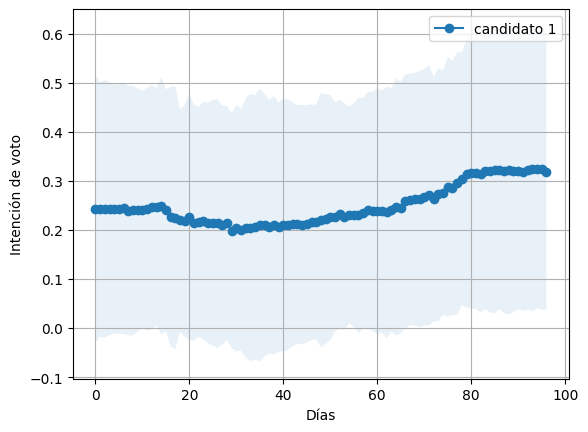

In [51]:
for i in range(1):
    plt.plot(range(days), porcentajes[:,i], 'o-', label= 'candidato {}'.format(i+1))
    plt.fill_between(range(days), porcentajes[:,i]-std[:,i], porcentajes[:,i]+std[:,i],alpha=0.1)
plt.xlabel("Días")
plt.ylabel("Intención de voto")
plt.grid()
plt.legend()

In [39]:
pred = porcentajes[-1]
print('Kast: {:%}'.format(pred[0]))
print('Sichel: {:%}'.format(pred[1]))
print('Boric: {:%}'.format(pred[2]))
print('Provoste: {:%}'.format(pred[3]))

Kast: 30.894776%
Sichel: 17.994113%
Boric: 32.914303%
Provoste: 18.196808%


In [ ]:
p = np.array([0.4,0.1,0.35,0.15])
p = p/p.sum()
a = np.array([0.25,0.25,0.25,0.25])
y = np.array([96,80,32,48])
x = np.power(p,a*0.001+y-1)
x.prod()


2.1748448547226404e-170

In [54]:
np.random.seed(756)
muestra, prediccion, c = modelo2021(datos2021, 10_000)
days = np.size(datos2021, 0)
#for i in range(weeks):
 #   print('aceptados semana {}: {:%}'.format(i+1, c[i]/10000))

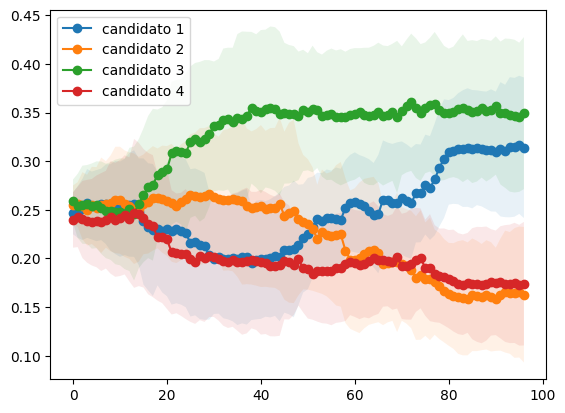

In [61]:
x = muestra[2000::200].mean(0)
s = muestra[2000::200].std(0)
for i in range(4):
    plt.plot(range(days), x[1:,i], 'o-', label= 'candidato {}'.format(i+1))
    plt.fill_between(range(days), x[1:,i]-s[1:,i],x[1:,i]+s[1:,i],alpha=0.1)
plt.legend()

In [28]:
pred = x[-1]
print('Kast: {:%}'.format(pred[0]))
print('Sichel: {:%}'.format(pred[1]))
print('Boric: {:%}'.format(pred[2]))
print('Provoste: {:%}'.format(pred[3]))

Kast: 29.271021%
Sichel: 19.105790%
Boric: 32.897145%
Provoste: 18.726044%


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d24ecb2b-b17d-41bb-82ac-38080033d82c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>